In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from metropolis_w_sampling import run_metropolis_w_sampling
import matplotlib.pyplot as plt

In [29]:
N = 26
M = 5000

beta_star = 10
max_moves = 10000000
T = 30
beta_grid = []
for t in range(T):
    beta_t = ((t + 1) * beta_star) / T
    beta_grid.append(beta_t)
    
print(beta_grid)

[0.3333333333333333, 0.6666666666666666, 1.0, 1.3333333333333333, 1.6666666666666667, 2.0, 2.3333333333333335, 2.6666666666666665, 3.0, 3.3333333333333335, 3.6666666666666665, 4.0, 4.333333333333333, 4.666666666666667, 5.0, 5.333333333333333, 5.666666666666667, 6.0, 6.333333333333333, 6.666666666666667, 7.0, 7.333333333333333, 7.666666666666667, 8.0, 8.333333333333334, 8.666666666666666, 9.0, 9.333333333333334, 9.666666666666666, 10.0]


In [30]:
#### get samples from pi_beta ####
beta_samples  = []

for beta in beta_grid:
    iters, conflict_ratios, samples = run_metropolis_w_sampling(
        N, max_moves, beta, M, beta_strategy="fixed", strategy_params=None, debug=False
    )
    
    beta_samples.append(samples)
    print(beta)
    #print(samples)
    print(iters)


0.3333333333333333
15001
0.6666666666666666
15001
1.0
15001
1.3333333333333333
15001
1.6666666666666667
15001
2.0
15001
2.3333333333333335
9249
2.6666666666666665
7458
3.0
5128
3.3333333333333335
12036
3.6666666666666665
7107
4.0
5371
4.333333333333333
8176
4.666666666666667
5332
5.0
5471
5.333333333333333
5720
5.666666666666667
5165
6.0
6066
6.333333333333333
6224
6.666666666666667
7258
7.0
6060
7.333333333333333
5626
7.666666666666667
5633
8.0
6418
8.333333333333334
7048
8.666666666666666
7224
9.0
6620
9.333333333333334
6212
9.666666666666666
6337
10.0
5401


In [31]:
## estimate Z_beta from the samples ##
##1/M sumM exp(−(βt+1 − βt) f(Xk))
z_t_ratios = []

for i, sample in enumerate(beta_samples):
    if i < len(beta_grid)-1:
        z_t1_over_z_t = np.mean(np.exp(-(beta_grid[i+1] - beta_grid[i]) * np.float_(sample)))
        print(z_t1_over_z_t)
        z_t_ratios.append(z_t1_over_z_t)
        

        

0.022527381374057392
0.04900158518959565
0.08021501814203312
0.14682150250798645
0.18036031362487534
0.27668127616284066
0.2835052151992285
0.4475236825517979
0.6070497075848873
0.6483689169661929
0.6714284620102328
0.7381012563468444
0.8239611759541476
0.8227145506018162
0.9842649435806965
0.9668431048068585
0.9127588769125561
0.9499961231852165
1.0
0.9769256486807065
0.970462562561789
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [32]:
log_zt_z0 = []
for i in range(len(z_t_ratios)):
    zt_z0 = np.sum(np.log(z_t_ratios[0:i]))
    log_zt_z0.append(zt_z0)

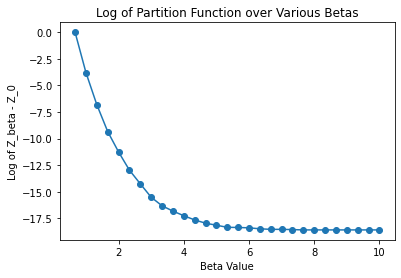

In [34]:
## plotting logs ##
plt.plot(beta_grid[1:], log_zt_z0)
plt.scatter(beta_grid[1:], log_zt_z0)

plt.xlabel("Beta Value")
plt.ylabel("Log of Z_beta - Z_0")
plt.title("Log of Partition Function over Various Betas")
plt.show()